The aim of this project is to clean the data of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website and analyze the included used car listings.

In [2]:
import pandas as pd
import numpy as np

In [3]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [4]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [6]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


There are missing entries for 'gearBox' and 'notRepairedDamage' columns.

There is at least one row where the price of the car is $0 and several columns in it have missing values.

There are columns where data type is not a float but a string(object) like 'odometer' for instance, which would need conversions to float.

The dataset contains 20 columns, most of which are strings.
Some columns have null values, but none have more than ~20% null values.
The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.


In [7]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
new_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 
        'abtest','vehicle_type', 'registration_year', 'gearbox', 
        'power_ps', 'model','odometer', 'registration_month', 'fuel_type', 
        'brand','unrepaired_damage', 'date_created', 'nr_of_pictures', 
        'postal_code','last_seen']

In [9]:
autos.columns = new_cols

In [10]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [11]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The preferred convention in Python is camel case, columns names are converted to camel case.

In [12]:
autos.describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


Nr of pictures are almost always zeros and likely to be dropped.

Registration year has minimum 1000 and maximum 9999 which doesn't look correct.

Postal code has min and max which don't seem correct.

Power PS has min of zero and very high max with a standard of 209 with 25% mark at 70, 50% at 105, 75 % at 150 but the mean at 116 and standard deviation at 209 which means there are cells with incorrect values for PS

There are columns where data type is not a float but a string(object) like 'odometer' and 'price' for instance, which would need conversions to float.

In [13]:
autos['price']  = autos['price'].str.replace('$', '').str.replace(',', '').astype(int)


In [14]:
autos['price'].head()


0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [15]:
autos['odometer']  = autos['odometer'].str.replace("km", "").str.replace(',', '').astype(int)

In [16]:
autos['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [17]:
autos.rename(columns={"odometer": "odometer_km"}, inplace=True)

In [18]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [19]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          50000 non-null object
name                  50000 non-null object
seller                50000 non-null object
offer_type            50000 non-null object
price                 50000 non-null int64
abtest                50000 non-null object
vehicle_type          44905 non-null object
registration_year     50000 non-null int64
gearbox               47320 non-null object
power_ps              50000 non-null int64
model                 47242 non-null object
odometer_km           50000 non-null int64
registration_month    50000 non-null int64
fuel_type             45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
date_created          50000 non-null object
nr_of_pictures        50000 non-null int64
postal_code           50000 non-null int64
last_seen             50000 non-null object
dtypes: int64(7), 

In [20]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,0.0,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,0.0,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30451.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49577.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71540.000000
max,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000


In [21]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [22]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [23]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [24]:
autos[autos['price'] == 0][['name', 'model', 'price']].head()

,name,model,price
27,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,NaN,0
71,Suche_Opel_Astra_F__Corsa_oder_Kadett_E_mit_Re...,NaN,0
80,Nissan_Primera_Hatchback_1_6_16v_73_Kw___99Ps_...,primera,0
87,Bmw_520_e39_zum_ausschlachten,5er,0
99,Peugeot_207_CC___Cabrio_Bj_2011,2_reihe,0


In [25]:
autos['price'].value_counts().head()

0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64

In [26]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [27]:
autos['price'].value_counts().sort_index(ascending=True)

0           1421
1            156
2              3
3              1
5              2
8              1
9              1
10             7
11             2
12             3
13             2
14             1
15             2
17             3
18             1
20             4
25             5
29             1
30             7
35             1
40             6
45             4
47             1
49             4
50            49
55             2
59             1
60             9
65             5
66             1
            ... 
151990         1
155000         1
163500         1
163991         1
169000         1
169999         1
175000         1
180000         1
190000         1
194000         1
197000         1
198000         1
220000         1
250000         1
259000         1
265000         1
295000         1
299000         1
345000         1
350000         1
999990         1
999999         2
1234566        1
1300000        1
3890000        1
10000000       1
11111111       2
12345678      

In [28]:
autos[(autos["price"] > 500 ) & (autos["price"] < 36000)].sort_values(by=['price'])['price']

37186      501
8229       510
27883      510
49177      517
10743      520
4226       520
16230      520
19475      520
3784       520
45264      520
28384      520
37829      520
8205       525
43347      525
20777      525
35133      525
3288       530
32031      530
5068       530
27335      530
41854      530
2586       530
31388      530
13329      530
4921       540
9739       540
17505      549
27953      549
29385      549
43867      549
         ...  
4478     35370
42023    35450
49249    35460
34809    35499
46057    35499
38649    35500
21552    35500
38724    35500
39606    35555
42919    35700
33626    35790
25800    35790
49358    35800
46158    35890
19700    35890
44764    35900
4371     35900
38760    35900
45436    35900
38406    35900
31227    35900
6257     35900
25403    35900
23116    35900
45012    35911
43539    35950
857      35980
20301    35990
34686    35999
29083    35999
Name: price, Length: 43838, dtype: int64

In [29]:
autos.describe([.01, .02, .05, .06, .07, .08, .09, .10, .11, .12, .13, .14, .15, .20, .40, .60, .80, .90, .95, .99])

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,0.0,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,0.0,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
1%,0.000000e+00,1978.000000,0.000000,5000.000000,0.000000,0.0,2729.970000
2%,0.000000e+00,1986.980000,0.000000,10000.000000,0.000000,0.0,4552.000000
5%,2.000000e+02,1992.000000,0.000000,30000.000000,0.000000,0.0,10115.000000
6%,2.700000e+02,1994.000000,0.000000,40000.000000,0.000000,0.0,12045.000000
7.0%,3.000000e+02,1994.000000,0.000000,40000.000000,0.000000,0.0,12357.000000
8%,3.900000e+02,1995.000000,0.000000,50000.000000,0.000000,0.0,13353.000000


In [30]:
autos = autos[(autos["price"] > 5000 ) & (autos["price"] < 36000)]
desc_cols = [.10, .11, .12, .13, .14, .15, .20, .40, .60, .80, .90, .95, .99]
print(autos.describe(desc_cols))
#print(x.sort_values(by=['price','odometer_km'])[['price', 'odometer_km']])

              price  registration_year      power_ps    odometer_km  \
count  16516.000000       16516.000000  16516.000000   16516.000000   
mean   11821.075381        2009.503391    158.160753  107520.586098   
std     6393.641135         124.552902    257.349702   45645.813573   
min     5012.000000        1001.000000      0.000000    5000.000000   
10%     5900.000000        2002.000000     80.000000   40000.000000   
11%     5950.000000        2003.000000     84.000000   40000.000000   
12%     5995.000000        2003.000000     86.000000   40000.000000   
13%     6000.000000        2003.000000     88.000000   40000.000000   
14.0%   6000.000000        2004.000000     90.000000   50000.000000   
15%     6200.000000        2004.000000     95.000000   50000.000000   
20%     6600.000000        2005.000000    105.000000   60000.000000   
40%     8500.000000        2007.000000    140.000000  100000.000000   
50%     9712.500000        2008.000000    143.000000  125000.000000   
60%   

In [31]:
autos[['date_crawled','date_created','last_seen']][0:5]

,date_crawled,date_created,last_seen
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21
12,2016-03-31 19:48:22,2016-03-31 00:00:00,2016-04-06 14:17:52
15,2016-04-01 12:06:20,2016-04-01 00:00:00,2016-04-02 21:10:48


In [32]:
print(autos['date_crawled'].str[:10])

1        2016-04-04
2        2016-03-26
5        2016-03-21
12       2016-03-31
15       2016-04-01
17       2016-03-29
22       2016-03-28
23       2016-03-10
28       2016-03-19
36       2016-03-16
37       2016-03-23
42       2016-03-22
43       2016-03-08
46       2016-03-31
50       2016-03-09
51       2016-03-22
53       2016-04-02
62       2016-03-12
63       2016-03-14
68       2016-04-03
72       2016-03-14
76       2016-03-22
79       2016-03-28
83       2016-04-05
89       2016-04-05
90       2016-03-07
91       2016-03-05
93       2016-03-06
94       2016-03-24
98       2016-04-04
            ...    
49906    2016-03-16
49907    2016-03-10
49910    2016-04-03
49911    2016-04-02
49912    2016-03-29
49916    2016-03-28
49918    2016-04-03
49930    2016-03-29
49933    2016-04-03
49939    2016-03-13
49942    2016-03-09
49947    2016-03-28
49948    2016-03-22
49953    2016-03-30
49963    2016-03-26
49964    2016-03-10
49965    2016-03-11
49970    2016-03-21
49973    2016-03-27


In [33]:
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:07:26    0.000061
2016-03-05 14:07:40    0.000061
2016-03-05 14:08:05    0.000061
2016-03-05 14:08:42    0.000061
2016-03-05 14:09:02    0.000121
2016-03-05 14:09:05    0.000061
2016-03-05 14:09:38    0.000061
2016-03-05 14:09:46    0.000061
2016-03-05 14:09:57    0.000061
2016-03-05 14:09:58    0.000061
2016-03-05 14:10:20    0.000061
2016-03-05 14:10:46    0.000061
2016-03-05 14:12:20    0.000061
2016-03-05 14:12:32    0.000061
2016-03-05 14:13:59    0.000061
2016-03-05 14:16:30    0.000061
2016-03-05 14:19:05    0.000061
2016-03-05 14:20:05    0.000061
2016-03-05 14:20:09    0.000061
2016-03-05 14:20:16    0.000061
2016-03-05 14:21:03    0.000061
2016-03-05 14:21:25    0.000061
2016-03-05 14:21:28    0.000061
2016-03-05 14:21:29    0.000061
2016-03-05 14:22:41    0.000061
2016-03-05 14:23:47    0.000061
2016-03-05 14:25:16    0.000061
2016-03-05 14:25:21    0.000061
2016-03-05 14:25:23    0.000121
2016-03-05 14:25:47    0.000061
                         ...   
2016-04-

In [34]:
autos[['date_crawled', 'date_created', 'last_seen']].sort_index()

,date_crawled,date_created,last_seen
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21
12,2016-03-31 19:48:22,2016-03-31 00:00:00,2016-04-06 14:17:52
15,2016-04-01 12:06:20,2016-04-01 00:00:00,2016-04-02 21:10:48
17,2016-03-29 11:46:22,2016-03-29 00:00:00,2016-04-05 20:46:26
22,2016-03-28 20:50:54,2016-03-28 00:00:00,2016-04-01 06:45:30
23,2016-03-10 19:55:34,2016-03-10 00:00:00,2016-03-17 08:45:17
28,2016-03-19 21:56:19,2016-03-19 00:00:00,2016-04-07 14:58:48
36,2016-03-16 23:46:31,2016-03-16 00:00:00,2016-04-05 16:21:16


In [35]:
# pd.to_datetime(autos['date_created']).value_counts(normalize=True, dropna=False).sort_index().describe()
pd.to_datetime(autos['date_created']).value_counts(dropna=False).sort_index()

2015-08-10      1
2015-09-09      1
2015-11-10      1
2016-01-03      1
2016-01-10      2
2016-01-14      1
2016-01-16      1
2016-01-22      1
2016-01-27      1
2016-01-29      1
2016-02-02      1
2016-02-05      2
2016-02-07      1
2016-02-09      1
2016-02-12      1
2016-02-14      2
2016-02-17      1
2016-02-18      1
2016-02-19      2
2016-02-21      1
2016-02-22      1
2016-02-23      4
2016-02-24      2
2016-02-25      3
2016-02-26      1
2016-02-27      1
2016-02-28      7
2016-02-29      3
2016-03-01      1
2016-03-02      3
             ... 
2016-03-09    520
2016-03-10    525
2016-03-11    540
2016-03-12    594
2016-03-13    328
2016-03-14    573
2016-03-15    549
2016-03-16    484
2016-03-17    472
2016-03-18    219
2016-03-19    569
2016-03-20    663
2016-03-21    592
2016-03-22    507
2016-03-23    538
2016-03-24    476
2016-03-25    506
2016-03-26    560
2016-03-27    531
2016-03-28    584
2016-03-29    568
2016-03-30    547
2016-03-31    518
2016-04-01    609
2016-04-02

In [36]:
# pd.to_datetime(autos['date_created']).value_counts(dropna=False).sort_index().describe()
pd.to_datetime(autos['date_created']).value_counts(dropna=False).describe(desc_cols)

count     66.000000
mean     250.242424
std      268.203944
min        1.000000
10%        1.000000
11%        1.000000
12%        1.000000
13%        1.000000
14.0%      1.000000
15%        1.000000
20%        1.000000
40%        3.000000
50%       34.500000
60%      472.000000
80%      547.000000
90%      588.000000
95%      615.750000
99%      672.800000
max      691.000000
Name: date_created, dtype: float64

The average number of ads created is 250, the min is 1 and the max is 691

This is over a period from 2015-08-10 to 2016-04-07

2016-04-03 was the day when max ads were created.

In [37]:
pd.to_datetime(autos['date_crawled'].str[:10]).value_counts(dropna=False).describe(desc_cols)

count     34.000000
mean     485.764706
std      163.654488
min       28.000000
10%      218.600000
11%      222.560000
12%      226.520000
13%      247.590000
14.0%    271.020000
15%      294.450000
20%      453.800000
40%      513.800000
50%      529.000000
60%      550.400000
80%      591.800000
90%      619.400000
95%      637.700000
99%      680.410000
max      688.000000
Name: date_crawled, dtype: float64

In [38]:
pd.to_datetime(autos['date_crawled'].str[:10]).value_counts(dropna=False).sort_index()

2016-03-05    431
2016-03-06    227
2016-03-07    553
2016-03-08    501
2016-03-09    521
2016-03-10    529
2016-03-11    529
2016-03-12    602
2016-03-13    298
2016-03-14    606
2016-03-15    551
2016-03-16    473
2016-03-17    480
2016-03-18    215
2016-03-19    583
2016-03-20    665
2016-03-21    585
2016-03-22    512
2016-03-23    548
2016-03-24    469
2016-03-25    506
2016-03-26    562
2016-03-27    526
2016-03-28    581
2016-03-29    575
2016-03-30    548
2016-03-31    510
2016-04-01    618
2016-04-02    623
2016-04-03    688
2016-04-04    620
2016-04-05    212
2016-04-06     41
2016-04-07     28
Name: date_crawled, dtype: int64

The max number of ads crawled is 688 and the min is 28.

The average number is 485.

This is over a period from 2016-03-05 to 2016-04-07 

2016-04-03 was the day when max number of ads were crawled.

In [39]:
pd.to_datetime(autos['last_seen'].str[:10]).value_counts(dropna=False).describe(desc_cols)

count      34.000000
mean      485.764706
std       921.172805
min        12.000000
10%        67.400000
11%        76.640000
12%        85.880000
13%        92.510000
14.0%      98.780000
15%       105.050000
20%       119.600000
40%       208.400000
50%       257.000000
60%       275.800000
80%       347.000000
90%       388.200000
95%      2543.000000
99%      3957.940000
max      4546.000000
Name: last_seen, dtype: float64

In [40]:
pd.to_datetime(autos['last_seen'].str[:10]).value_counts(dropna=False).sort_index()

2016-03-05      12
2016-03-06      31
2016-03-07      41
2016-03-08      59
2016-03-09     107
2016-03-10     130
2016-03-11     128
2016-03-12     264
2016-03-13      87
2016-03-14     178
2016-03-15     207
2016-03-16     180
2016-03-17     333
2016-03-18     106
2016-03-19     196
2016-03-20     282
2016-03-21     267
2016-03-22     289
2016-03-23     264
2016-03-24     241
2016-03-25     250
2016-03-26     214
2016-03-27     183
2016-03-28     278
2016-03-29     309
2016-03-30     353
2016-03-31     315
2016-04-01     370
2016-04-02     369
2016-04-03     396
2016-04-04     343
2016-04-05    2424
2016-04-06    4546
2016-04-07    2764
Name: last_seen, dtype: int64

Crawler added an average of 485 ads.

This is over a period from 2016-03-05 to 2016-04-07.

Min added is 12 ads and max added is 4546 ads on 2016-04-06.

In [55]:
autos['registration_year'].value_counts(dropna=False).describe(desc_cols)

count      81.000000
mean      203.901235
std       435.748368
min         1.000000
10%         1.000000
11%         1.000000
12%         1.000000
13%         1.000000
14.0%       1.000000
15%         1.000000
20%         2.000000
40%        14.000000
50%        19.000000
60%        24.000000
80%       164.000000
90%       746.000000
95%      1431.000000
99%      1619.200000
max      1628.000000
Name: registration_year, dtype: float64

In [ ]:
autos['registration_year'].value_counts(dropna=False).sort_index()

Average of 203 registrations over a period of 1001 to 9999.

Clearly, there are many rows with invalid entries.

The registration year 2008 has max registrations of 1628.

Many registrations are invalid due to invalid registration years and need to be dropped.

In [ ]:
autos = autos[(autos["registration_year"] >= 1900 ) & (autos["registration_year"] <= 2016)]

In [53]:
autos['registration_year'].value_counts(normalize=True).sort_index()

1001    0.000061
1927    0.000061
1929    0.000061
1931    0.000061
1937    0.000182
1938    0.000061
1939    0.000061
1941    0.000121
1948    0.000061
1950    0.000061
1951    0.000061
1953    0.000061
1954    0.000121
1956    0.000121
1957    0.000121
1959    0.000363
1960    0.000605
1961    0.000242
1962    0.000061
1963    0.000363
1964    0.000303
1965    0.000666
1966    0.000727
1967    0.001150
1968    0.001150
1969    0.000666
1970    0.001393
1971    0.001029
1972    0.001332
1973    0.000908
          ...   
1995    0.002240
1996    0.002664
1997    0.002846
1998    0.005570
1999    0.006479
2000    0.009869
2001    0.012533
2002    0.017922
2003    0.030395
2004    0.045168
2005    0.069872
2006    0.086643
2007    0.087491
2008    0.098571
2009    0.097905
2010    0.085069
2011    0.091971
2012    0.073444
2013    0.044018
2014    0.034996
2015    0.016953
2016    0.009930
2017    0.017861
2018    0.005752
4500    0.000061
5000    0.000061
5911    0.000061
8888    0.0000

In [60]:
autos['brand'].value_counts(normalize=True, dropna=False).head(20)

volkswagen        0.213853
bmw               0.166142
mercedes_benz     0.134052
audi              0.131448
opel              0.052071
ford              0.042625
skoda             0.022887
mini              0.020465
seat              0.017135
renault           0.015924
toyota            0.014108
sonstige_autos    0.014047
peugeot           0.013986
nissan            0.013684
fiat              0.012473
hyundai           0.011928
mazda             0.010838
smart             0.009688
citroen           0.009566
porsche           0.008598
Name: brand, dtype: float64

The idea here is to aggregate on top 20 brands based on their value count. 

The top brand is 20% and the 20th brand is abiut 0.9 % of the total count.

In [296]:

brands = autos['brand'].value_counts(normalize=True, dropna=False).head(20).index.tolist()
print(brands)

['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel', 'ford', 'skoda', 'mini', 'seat', 'renault', 'toyota', 'sonstige_autos', 'peugeot', 'nissan', 'fiat', 'hyundai', 'mazda', 'smart', 'citroen', 'porsche']


In [297]:
brand_price = {}
brands = autos['brand'].value_counts(normalize=True, dropna=False).head(20).index.tolist()
# print(brands)

for b in brands:
    selected_rows = autos.loc[autos["brand"] == b]['price']
    brand_price[b] = selected_rows.mean()

#print(brand_avg)


In [298]:
brand_mean_price_series = pd.Series(brand_price) 

In [299]:
brand_mean_mileage_series = brand_mean_mileage_series.sort_values()
print(brand_mean_mileage_series)

smart              55500.000000
fiat               69951.456311
renault            78688.212928
mini               79541.420118
hyundai            79847.715736
peugeot            84458.874459
seat               88197.879859
skoda              88835.978836
mazda              88882.681564
sonstige_autos     88922.413793
citroen            90632.911392
opel               90790.697674
nissan             91327.433628
ford               92002.840909
toyota             95171.673820
volkswagen        108200.736127
audi              119115.614924
porsche           120035.211268
mercedes_benz     121115.627823
bmw               124985.422741
dtype: float64


In [300]:
brand_mean_price_series.describe(desc_cols)

count       20.000000
mean     10952.617759
std       2655.287019
min       6926.781250
10%       8673.559772
11%       8736.904790
12%       8797.176614
13%       8857.448439
14.0%     8917.720263
15%       8977.992088
20%       9080.810839
40%       9852.820297
50%      10290.961692
60%      11038.385358
80%      12726.068087
90%      13609.204655
95%      13951.549408
99%      18046.354952
max      19070.056338
dtype: float64

Out of top 20 count of cars, 'smart' has the lowest mean price ($6926.78).

Porsche has the highest mean price is $19070.

10 percentile of the cards have a mean price of less than $8673.

Mean price for all cars in top 20 category is $10952.

Only 1 percentile cars have mean price more than $18046.

In [301]:
brand_mileage = {}
brands = autos['brand'].value_counts(normalize=True, dropna=False).head(20).index.tolist()
# print(brands)

for b in brands:
    selected_rows = autos.loc[autos["brand"] == b]['odometer_km']
    brand_mileage[b] = selected_rows.mean()

#print(brand_avg)

In [302]:
brand_mean_mileage_series = pd.Series(brand_mileage).sort_values()

In [303]:
print(brand_mean_mileage_series)

smart              55500.000000
fiat               69951.456311
renault            78688.212928
mini               79541.420118
hyundai            79847.715736
peugeot            84458.874459
seat               88197.879859
skoda              88835.978836
mazda              88882.681564
sonstige_autos     88922.413793
citroen            90632.911392
opel               90790.697674
nissan             91327.433628
ford               92002.840909
toyota             95171.673820
volkswagen        108200.736127
audi              119115.614924
porsche           120035.211268
mercedes_benz     121115.627823
bmw               124985.422741
dtype: float64


In [305]:
#pd.DataFrame({'Gene':s.index, 'count':s.values})
#price_mileage = pd.DataFrame({'Brand':brand_mean_mileage.index, 'Mileage' : brand_mean_mileage.values, 'Price' :  brand_mean_price.values})
#print(brand_mean_price)
df1 = pd.DataFrame(pd.Series(brand_mileage), columns=['mean mileage'])
df1

,mean mileage
audi,119115.614924
bmw,124985.422741
citroen,90632.911392
fiat,69951.456311
ford,92002.840909
hyundai,79847.715736
mazda,88882.681564
mercedes_benz,121115.627823
mini,79541.420118
nissan,91327.433628


In [317]:
df1['mean price'] = pd.Series(brand_price)
df1

,mean mileage,mean price
audi,119115.614924,13682.154307
bmw,124985.422741,12595.113338
citroen,90632.911392,9322.487342
fiat,69951.456311,8360.402913
ford,92002.840909,10799.636364
hyundai,79847.715736,9908.274112
mazda,88882.681564,10295.351955
mercedes_benz,121115.627823,13249.887082
mini,79541.420118,12143.073964
nissan,91327.433628,11396.508850


In [312]:
import matplotlib.pyplot as plt
%matplotlib inline

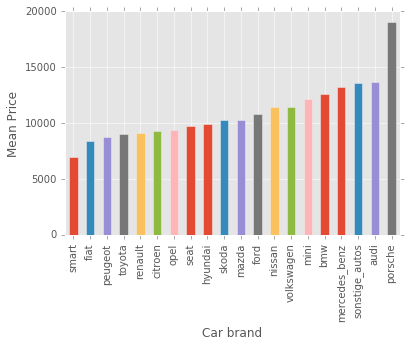

In [336]:
brand_mean_price.plot(kind='bar')
plt.xlabel('Car brand')
plt.ylabel('Mean Price')
plt.show()

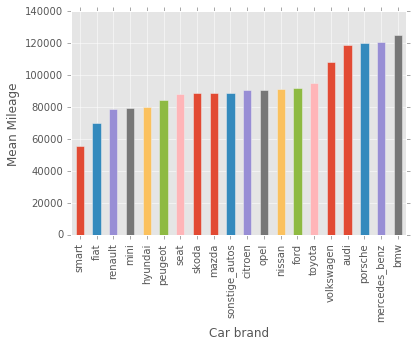

In [337]:
brand_mean_mileage.plot(kind='bar')
plt.xlabel('Car brand')
plt.ylabel('Mean Mileage')
plt.show()

In [331]:
df1

,mean mileage,mean price
audi,119115.614924,13682.154307
bmw,124985.422741,12595.113338
citroen,90632.911392,9322.487342
fiat,69951.456311,8360.402913
ford,92002.840909,10799.636364
hyundai,79847.715736,9908.274112
mazda,88882.681564,10295.351955
mercedes_benz,121115.627823,13249.887082
mini,79541.420118,12143.073964
nissan,91327.433628,11396.508850


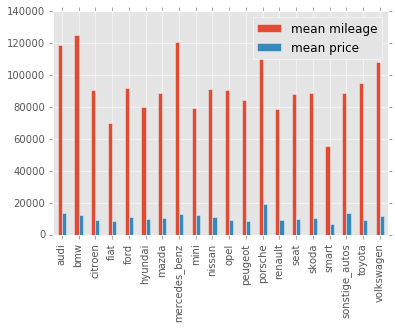

In [339]:
df1.plot(kind='bar')

The mean price is not tied to the mean mileage. 

For example, bmw has mileage but it also has high mean price.

Another data point is that the mean mileage of Volkswagen,  Audi and Porsche are comparable.
However, their prices show a steady increase from Volkwasgen to Audi to Porsche.
